## **<center>Supervised Machine Learning</center>**
## <center>Decision Trees and Random Forests</center>
### <center>Classification</center>

### **WORKING ENVIRONMENT SET UP**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

## LOAD DATA

### **Kyphosis Dataset: Data on Children who have had Corrective Spinal Surgery**

https://stat.ethz.ch/R-manual/R-patched/library/rpart/html/kyphosis.html

### **Description**

The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery

This data frame contains the following columns:

- **Kyphosis**: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

- **Age**: in months

- **Number**: the number of vertebrae involved

- **Start**: the number of the first (topmost) vertebra operated on.


### **Model**

Classification problem, we are trying to predict the "absent" or "present" of kyphosis



In [2]:
df = pd.read_csv('data/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Descriptive Analysis

In [5]:
df.count()

Kyphosis    81
Age         81
Number      81
Start       81
dtype: int64

In [6]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [56]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

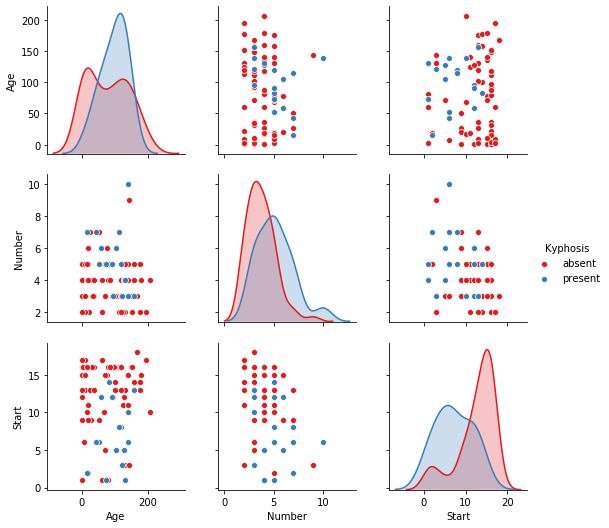

In [8]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split


In [70]:
X1 = df.drop('Kyphosis',axis=1)
y1 = df['Kyphosis']




In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

## Decision Trees

We'll start just by training a single decision tree.

In [92]:
dtree = DecisionTreeClassifier(max_depth = 5  )

In [93]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

In [94]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 


In [95]:
predictions = dtree.predict(X_test)

In [81]:
print(classification_report(y_test,predictions)) # Split test (30%)

              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

    accuracy                           0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



In [96]:
print(classification_report(y_test,predictions)) # Split test (40%)

              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        24
     present       0.44      0.44      0.44         9

    accuracy                           0.70        33
   macro avg       0.62      0.62      0.62        33
weighted avg       0.70      0.70      0.70        33



In [82]:
print(confusion_matrix(y_test,predictions)) # Split test (30%)

[[17  4]
 [ 2  2]]


In [97]:
print(confusion_matrix(y_test,predictions)) # Split test (40%)

[[19  5]
 [ 5  4]]


## Tree Visualization

In [26]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

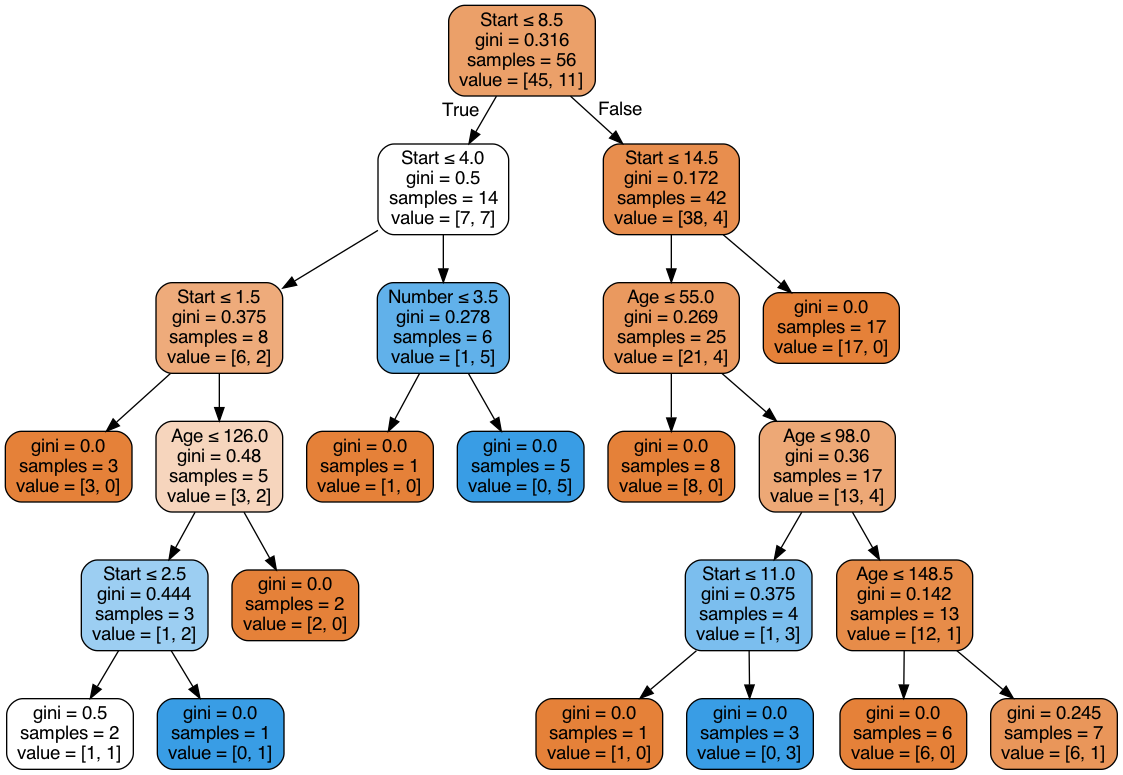

In [27]:
dot_data = export_graphviz(dtree,
                           feature_names=features,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)


graph = pydot.graph_from_dot_data(dot_data)  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [87]:
rfc = RandomForestClassifier(n_estimators=4, max_depth = None )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
rfc_pred = rfc.predict(X_test)

In [89]:
print(confusion_matrix(y_test,rfc_pred))

[[18  3]
 [ 2  2]]


In [90]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        21
     present       0.40      0.50      0.44         4

    accuracy                           0.80        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.82      0.80      0.81        25



## Resampling

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
oversample = SMOTE()
X_1, y_1 = oversample.fit_resample(X, y)

In [68]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [69]:
y_1.value_counts()

present    64
absent     64
Name: Kyphosis, dtype: int64

In [26]:
y_2.value_counts()

absent     64
present    64
Name: Kyphosis, dtype: int64